PROJECT OVERVIEW

The Syrial Customer churn project aims to address the high rate of customers attrition within the telecommunications sector.Leveraging customer data such as service plans,call activity,and account details,we will build robust classification models to predict whether a customer is likely to churn.By understanding these patterns,SyrialTel can proactively enhance customer retention strategies,improve customer satisfaction and reduce financial losses. 

Stakeholder.

The primary stakeholders are as follows:

    1.Customer retention team,interested in understanding the factors leading to customer churn in order to develop effective strategies to retain customers.
    2.Upper management.Focused on reducing churn rates to improve profitability and customer satisfaction,which are critical to the long-term success of the company

Business understanding 

SyrailTel is experiencing high customer churn,negatively affecting revenue and growth.The company seeks to understand the factors contributing to churn and develop a predictive model to identify at risk customers.By predicting churn,SyrialTel can intervene with targeted retention strategies  ensuring a more stable customer base.

Data description

1.State-The customer's location,represented as a categorical variable.

2.Account length-Duration of the customer's account in days

3.Area code-Numeric representation of the customer's area code.

4.International Plan-whether the customer has subscribed to an international calling plan

5.Voice Mail Plan-subscription status to a voicemail plan.

6.Total Day/Eve/Night/Intl calls-call counts across different time segments.

7.Total Day/Eve/Night/Intl charge-charges accrued in different time segments

8.customer service calls-number of calls made to customer service.

9.churn-the target variable indicating whether the customer has churned(True/False)


Problem statement

SyrailTel is losing customers at an alarming rate,impacting its revenue and market position.The company needs a data-driven approach to understand churn dynamics,enabling proactive measures to retain customers.The primary goal is to build a model that can accurately predict customer churn and provide actionable insights to improve retention strategies

In [29]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

In [30]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv') 
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Getting the data insights,by performing explatory data analysis

In [31]:
df.shape

(3333, 21)

In [32]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [33]:
col_names = df.columns 
col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Separating the dataset into categorical and numerical variables.

In [35]:
categorical = [var for var in df.columns if df[var].dtype=='O'] 
print('There are {} categorical variables\n'.format(len(categorical))) 
print('The categorical variables are :',categorical)

There are 4 categorical variables

The categorical variables are : ['state', 'phone number', 'international plan', 'voice mail plan']


In [36]:
df[categorical].head()

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


checking missing values in categorical variables

In [37]:
df[categorical].isnull().sum()

state                 0
phone number          0
international plan    0
voice mail plan       0
dtype: int64

viewing categorical variables

In [38]:
for var in categorical: 
    print(df[var].value_counts())

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64
international plan
no     3010
yes     323
Name: count, dtype: int64
voice mail plan
no     2411
yes     922
Name: count, dtype: int64


checking for cardinality in categorical variables

In [39]:
for var in categorical: 
    print(var,'contains',len(df[var].unique()),'labels')

state contains 51 labels
phone number contains 3333 labels
international plan contains 2 labels
voice mail plan contains 2 labels


Phone number has very high cardinality which might not be useful for the model.Phone numbers are typically unique identifiers and don't provide meaningful information for prediction.I might consider dropping it.


In [40]:
df.drop('phone number',axis = 1,inplace = True)

Feature engineering

In [41]:
print('State contains',len(df['state'].unique()),'labels')

State contains 51 labels


checking labels in state variable

In [42]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

checking for frequency distribution of values in state variable

In [43]:
df['state'].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

exploring international plan variable

In [44]:
print('International plan contains',len(df['international plan'].unique()),'labels')

International plan contains 2 labels


checking frequency distribution of values in international 

In [45]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [46]:
pd.get_dummies(df['international plan'],drop_first=False,dtype='int').head()

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


exploring voice mail plan variable

In [47]:
print('voice mail plan contains',len(df['voice mail plan'].unique()),'labels')

voice mail plan contains 2 labels


In [48]:

df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [49]:
pd.get_dummies(df['voice mail plan'],drop_first=False,dtype = 'int').head()


,no,yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


frequency of categorical features

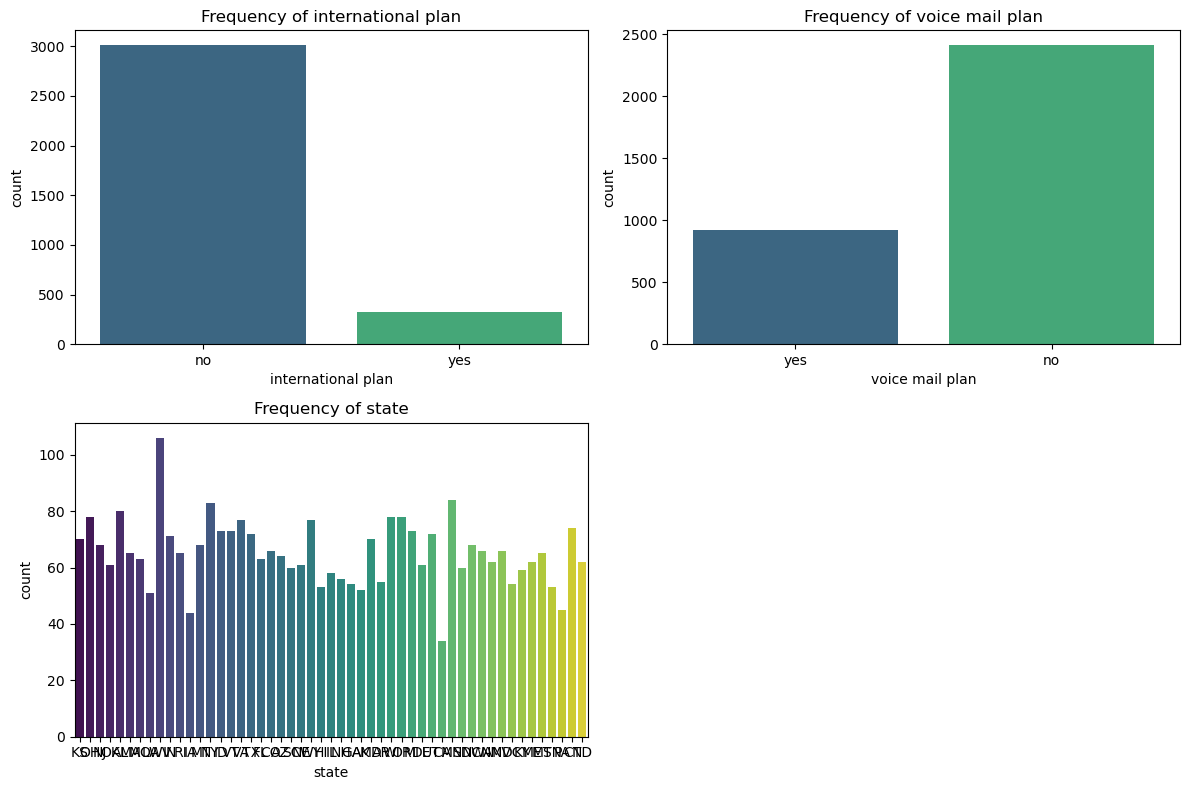

In [50]:
import seaborn as sns 
categorical_features = ['international plan','voice mail plan','state'] 
plt.figure(figsize=(12,8)) 
for i,feature in enumerate(categorical_features,1): 
    plt.subplot(2,2,i) 
    sns.countplot(data = df,x=feature,palette = 'viridis') 
    plt.title(f'Frequency of {feature}') 
plt.tight_layout() 
plt.show()

Observation
1.International plan-a large majority of customers do not have an international plan.Only a small fraction of the customers have subscribed to it. 
This skewed distribution suggests that having an international plan is not common among customers.This variable could still be significant if having an international plan correlates with churn,especially if customers with the plan are more or less likely to churn.
2.Voice mail plan.
Most customers do not have a voicemail plan,while a smaller proportion does have one.Similar to international plan,the voice mail plan is less frequently used among customers.Analyzing the relationship between having a voicemail plan and churn will help determine if this feature plays a role in predicting churn. 
3.State.
the state var shows a fairly even distribution across various states,with some states having slightly more customers than others.The state variable doesn't show any extreme imbalances,However the relationship between different states and churn can reveal if behavior,possibly due to regional service quality or marketing strategies


Cross-tabulation with churn

In [51]:
#international plan vs Churn 
international_plan_ct = pd.crosstab(df['international plan'],df['churn']) 
print(international_plan_ct) 
#voice mail plan vs churn
voice_mail_plan_ct = pd.crosstab(df['voice mail plan'],df['churn']) 
print(voice_mail_plan_ct) 
#state vs churn 
state_ct = pd.crosstab(df['state'],df['churn']) 
print(state_ct)

churn               False  True 
international plan              
no                   2664    346
yes                   186    137
churn            False  True 
voice mail plan              
no                2008    403
yes                842     80
churn  False  True 
state              
AK        49      3
AL        72      8
AR        44     11
AZ        60      4
CA        25      9
CO        57      9
CT        62     12
DC        49      5
DE        52      9
FL        55      8
GA        46      8
HI        50      3
IA        41      3
ID        64      9
IL        53      5
IN        62      9
KS        57     13
KY        51      8
LA        47      4
MA        54     11
MD        53     17
ME        49     13
MI        57     16
MN        69     15
MO        56      7
MS        51     14
MT        54     14
NC        57     11
ND        56      6
NE        56      5
NH        47      9
NJ        50     18
NM        56      6
NV        52     14
NY        68     15
OH      

countplots for categorical variables vs churn

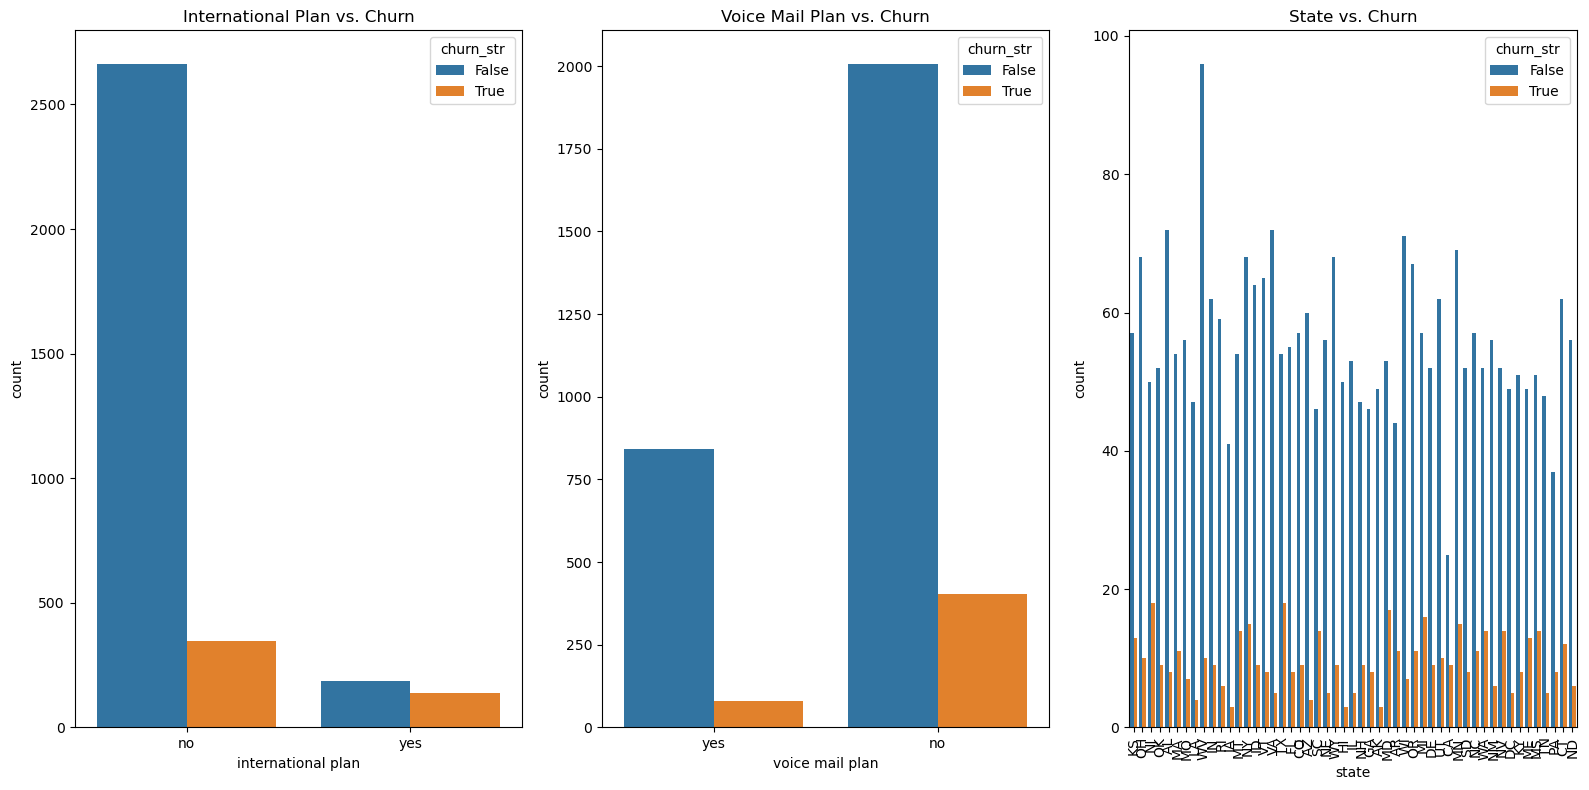

In [52]:
df['churn_str']  = df['churn'].astype(str)
# Set up the figure size
plt.figure(figsize=(16, 8))

# Count plot for International Plan vs. Churn
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='international plan', hue='churn_str')
plt.title('International Plan vs. Churn')

# Count plot for Voice Mail Plan vs. Churn
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='voice mail plan', hue='churn_str')
plt.title('Voice Mail Plan vs. Churn')

# Count plot for State vs. Churn (rotated x-axis labels for better readability)
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='state', hue='churn_str')
plt.title('State vs. Churn')
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

Interpretation of the plots

International plan vs churn.
Customers without the international plan are significantly less likely to churn compared to those with the plan.A higher proportion of customers with the international plan churn compared to those without it,indicating that having an international plan is associated with higher churn rates.

Voice mail plan vs churn.
Customers with the voice mail plan are less likely to churn compared to those without it.The churn rate is higher among customers who do not have the voice mail plan,suggesting that not having this plan might be associated with increased churn. 

State vs churn
The churn rates are fairly consistent across different states,with no particular state showing an extremely high or low churn rate compared to others. 
The variation in churn rates across states does not seem substantial,suggesting that the state variable might not be a strong predictor of churn.



Conclusion-
State variable,given the visual analysis,the state does not appear to have a significant impact on churn.as there is no clear pattern or significant differences in churn rates across states.Dropping the variable might be appropriate inorder to simplify the model
International and Voice mail plans,these variables show clear differences in churn rates,making them important features to include in this analysis or predictive model 

Exploring numerical variables

In [53]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [54]:
df[numerical].head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
df[numerical].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [56]:
df[numerical].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [57]:
print(round(df[numerical].describe()),2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51